In [1]:
import pandas as pd
import geopandas as gpd
import mio
import pathlib
from matplotlib import pyplot as plt
import numpy as np

In [2]:
tag = '1091'

In [3]:
empty = pd.DataFrame(
        columns = range(672500, 690000, 1),
        index = range(254000, 242000, -1),
        data = 0
)

In [4]:
tifs = list(pathlib.Path('tif').glob(f'{tag}*.tif'))

In [5]:
res = empty.copy()
for tif in tifs:
    print(tif)
    r = (
        mio.read_raster(tif)[0]
        .reindex( columns = range(672500, 690000, 1),
                 index = range(254000, 242000, -1),
                 fill_value = 0
                )
    )
    res = np.maximum(res, r)

tif\1091-11_raster.tif
tif\1091-12_raster.tif
tif\1091-13_raster.tif
tif\1091-14_raster.tif
tif\1091-21_raster.tif
tif\1091-22_raster.tif
tif\1091-23_raster.tif
tif\1091-24_raster.tif
tif\1091-31_raster.tif
tif\1091-32_raster.tif
tif\1091-33_raster.tif
tif\1091-34_raster.tif
tif\1091-41_raster.tif
tif\1091-42_raster.tif
tif\1091-43_raster.tif
tif\1091-44_raster.tif


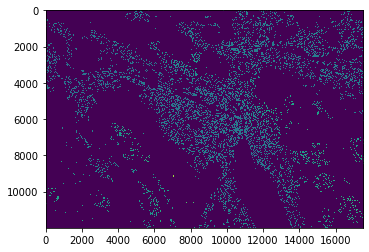

In [6]:
plt.imshow(res)

In [8]:
mio.write_raster(res.astype('uint8'), '25k_bui/1091_bui.bil')